<a href="https://colab.research.google.com/github/Victoria59Olmedo/proyecto_integrado_2x/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Física", "Química", "Biología", "Educación Física", "Inglés", "Ciudadanía", "Arte", "Música", "Informática"]

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Sofia", "Lucas", "Martina", "Camila", "Mateo", "Valentina"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Lopez", "Gonzalez", "Martinez", "Sanchez", "Romero", "Fernandez", "Torres"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Generar datos aleatorios para 100 alumnos
num_alumnos = 100
data = []
for _ in range(num_alumnos):
  nombre = generar_nombre()
  dni = random.randint(10000000, 99999999)  # DNI aleatorio (ajustar rango si es necesario)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre Completo", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Nombre Completo,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Ana Martinez,14646261,Arte,7,1,2,8
1,Pedro Sanchez,60665448,Arte,6,4,2,11
2,Juan Romero,10475401,Música,8,7,3,2
3,Valentina Lopez,37273382,Arte,3,5,2,9
4,Pedro Torres,88211794,Geografía,10,9,2,11
...,...,...,...,...,...,...,...
95,Camila Martinez,78804339,Química,8,3,3,18
96,Sofia Perez,88053125,Música,8,7,6,2
97,Lucas Gonzalez,92901708,Inglés,8,10,8,4
98,Juan Martinez,54519580,Química,7,7,5,3


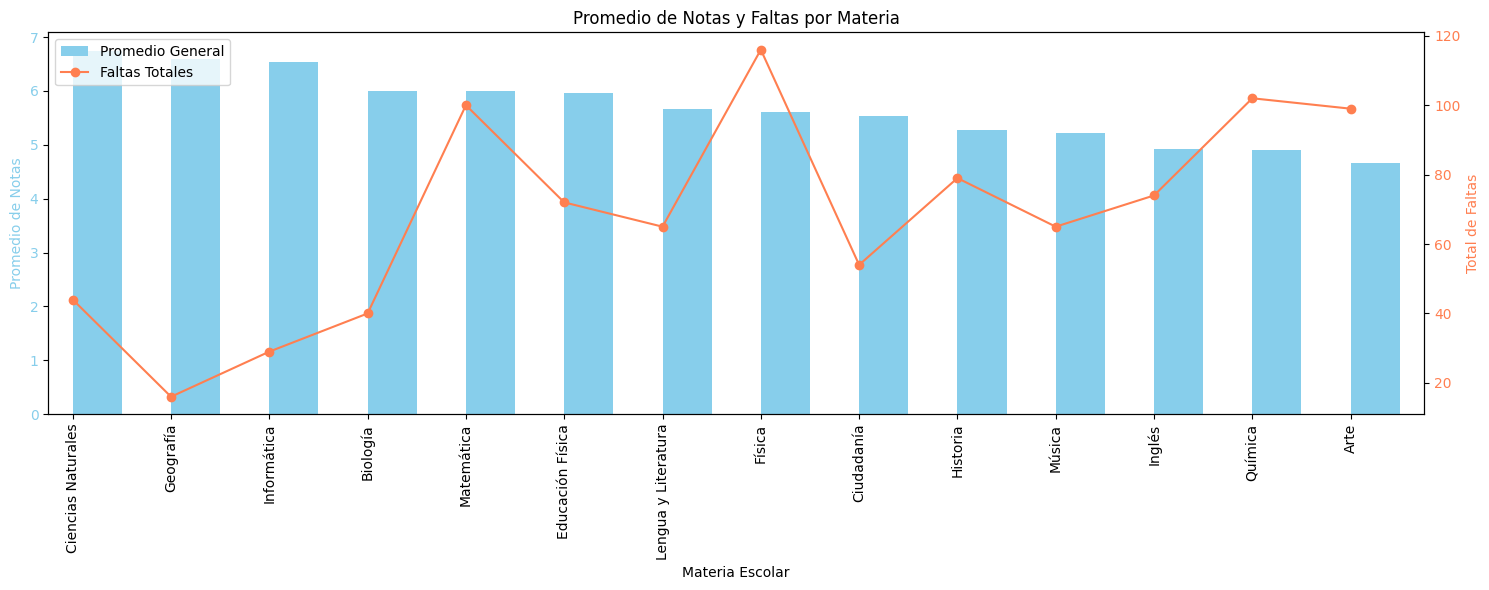

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# ... (previous code remains unchanged)

# Calculate average grades per subject
average_grades = df.groupby("Materia Escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1).sort_values(ascending=False)

# Calculate total absences per subject
total_absences = df.groupby("Materia Escolar")["Faltas a clases"].sum()


# Create the bar plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot average grades
average_grades.plot(kind="bar", ax=ax1, color="skyblue", position=0, label="Promedio General")
ax1.set_ylabel("Promedio de Notas", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, marker="o", color="coral", linestyle="-", label="Faltas Totales")
ax2.set_ylabel("Total de Faltas", color="coral")
ax2.tick_params(axis="y", labelcolor="coral")

# Customize the plot
plt.title("Promedio de Notas y Faltas por Materia")
plt.xlabel("Materia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")


plt.show()

In [10]:
df.to_csv("datos_alumnos.csv", index=False)

NameError: name 'df' is not defined